# This notebook demonstrates how to train a classfier with unlabeled data using supervised learning and factes visualizaiton tool.
* Assumes mnist dataset is unlabelled
* Uses facets tool for visualization
* Interactively stores user's labeled data into browser cache
* Load data from browser's cache to jupyter notebook and trains classifier based on user's choice. 
* Allows user to interactively repeat and retrain. 

In [1]:
from keras.layers import Activation
from keras.layers import AveragePooling2D
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.models import Model
from keras import initializers
from keras.optimizers import SGD, Adam
from keras.models import load_model
from tensorflow.examples.tutorials.mnist import input_data
import sklearn.utils
from matplotlib import pyplot as plt
import random
import numpy as np
import pandas as pd
from PIL import Image

%matplotlib inline

Using TensorFlow backend.


In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
x, y = mnist.train.next_batch(60000)
x, y = sklearn.utils.shuffle(x, y, random_state=0)

In [4]:
print(x.shape)
x = x.reshape((x.shape[0], 28, 28, 1))
print(x.shape)

(60000, 784)
(60000, 28, 28, 1)


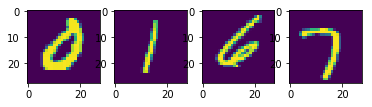

In [5]:
fig, axes = plt.subplots(1, 4)
for i in range(4):
    img_index = int(random.random()*60000)
    axes[i].imshow(x[img_index, :, :, 0])

In [16]:
x_test, y_test = mnist.test.next_batch(10000)
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [17]:
def array_to_sprite_atlas(image_array, num_sprites_x, num_sprites_y):
    "Takes an array of images of shape (num_images, img_width, img_height) and splices them together to form a big ass mosaic (sprite atlas)."
    # Mnist arrays are in 0-1 range, PIL needs 0-255
    image_array = image_array * 255
    image_width, image_height = image_array.shape[1], image_array.shape[2]
    atlas_width  = num_sprites_x * image_width
    atlas_height = num_sprites_y * image_height
    # We paste the samples to get indices arranged in the following way:
    # | 0 | 1 | 2 | 3 |
    # | 4 | 5 | 6 | 7 |
    atlas  = Image.new("RGB", (atlas_width, atlas_height), (0, 0, 0))
    for i in range(num_sprites_y): 
        for j in range(num_sprites_x):
            sample = image_array[num_sprites_x * i + j, :, :]
            image = Image.fromarray(sample)
            atlas.paste(image, (j*image_width, i*image_height))
    return atlas

In [18]:
atlas = array_to_sprite_atlas(x_test.reshape(x_test.shape[0], 28, 28), 100, 100)
atlas.save("atlas.jpg", "JPEG")

In [19]:
zeros = ''
ones = ''

## Load Unlabeled Data into Facets

In [20]:
df = pd.DataFrame()
df['Id'] = [x for x in range(len(x_test))]


In [21]:
jsonstr = df.to_json(orient='records')

In [73]:
# Display the Dive visualization for this data
jsonstr = df.to_json(orient='records')
from IPython.core.display import display, HTML

HTML_TEMPLATE = '''
        <head>
        <link rel="import" href="./facets-jupyter.html"></link>
        </head>        
            <select id="ClassValue">
                  <option value="newZeros">Zeros</option>
                  <option value="newOnes">Ones</option>
            </select>
        
        <input type="button" onclick="localStorage.clear()" value="Erase">
        
        <p id="newZeros">0</p>
        <p id="newOnes">0</p>
        
        
        <facets-dive id="elem" height="800" sprite-image-width="28" sprite-image-height="28" atlas-url="atlas.jpg"></facets-dive>
        <script>
              var data = JSON.parse('{jsonstr}');       
'''
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
html += '''

             document.querySelector("#elem").data = data;
             document.getElementById("elem").addEventListener("click", function(e){ 

    if (e.ctrlKey)
    {
        var e = document.getElementById("ClassValue");
        var keyVal = e.options[e.selectedIndex].value;


        //var html = document.getElementById("infoCard").querySelector("dl").innerHTML;
        var theAnchorText = document.getElementById("infoCard").getElementsByTagName("dd")[0].innerHTML;
        console.log(theAnchorText);
        var existingItem = localStorage.getItem(keyVal);
        if (!existingItem)
            existingItem = theAnchorText; 
        else
            existingItem = (existingItem || "")+ "," + theAnchorText;
        localStorage.setItem(keyVal, existingItem);
        //document.getElementById(keyVal).innerHTML = existingItem;  
        var element = document.getElementById(keyVal);
        element.innerHTML = keyVal + " : " + existingItem.split(",").length;
    }      
});
</script>
'''

# View it at the bottow cell

In [78]:
#display(HTML(html))

In [28]:
# Tag 5 good examples of of each digits

In [29]:
# f = file("test-mnist.html", "w")
# f.write(html)
# f.close()

# Chose 10 good examples of each digit

In [36]:
newZeros = ''
newOnes = ''

In [40]:
%%javascript
for (var i =0; i <  localStorage.length; i++){
    console.log(i);
    var key = localStorage.key(i);
    var existingItem = localStorage.getItem(key);
    console.log(key);
    var var_name = key;
    if( key == null)
        continue
    var value_name = existingItem.replace('\n', ' ').replace('\r', ' ');
    //value_name = 'f1sadf';
    var command =  var_name += " = \" " +  value_name + " \" ;";
    console.log("Executing Command: " + command);
    var kernel = IPython.notebook.kernel;
    kernel.execute(command);
}

<IPython.core.display.Javascript object>

In [41]:
#newZeros = newZeros.replace('---', '\n')
print newZeros

 6941,6942,7042 


In [42]:
#newOnes = newOnes.replace('---', '\n')
print newOnes

 7542,7543,7347 


In [43]:
zeros += newZeros
ones += newOnes

In [44]:
import ast
def convertDict(yy, v, d):
    #jsonStr = yy.replace("</dt><dd>", '\':\'').replace('</dd><dt>', '\',\'').replace('<dt>', '{\'').replace('</dd>', '\'}')   
    #print yy.split(',')
    #d = {}
    for x in yy.split(','):
        if x == ' ' or x == '':
            continue
        d[x] = v
    print d
    return d


In [45]:
d = {}

In [46]:
df['Omit'] = [-1] * len(df)

In [47]:
df_tmp = df[df.Omit != -1]
tmp = df_tmp.apply(lambda x : [x['Id'] , x['Omit']], axis = 1)
for x in tmp.values:
    d[x[0]] = x[1]
d

{}

In [48]:
d = convertDict(zeros, 0, d)
d = convertDict(ones, 1, d)

{'6942': 0, ' 6941': 0, '7042 ': 0}
{'7543': 1, '6942': 0, '7347 ': 1, ' 6941': 0, '7042 ': 0, ' 7542': 1}


In [49]:
df['Omit'] = df.Id.apply(lambda x: d[str(x)]  if str(x) in d else -1)

In [50]:
df.head()

,Id,Omit
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1


In [51]:
df_train = df.copy()

In [52]:
len(df_train)

10000

In [53]:
one_dim = x_test.reshape(x_test.shape[0], 28*28)

In [54]:
df_train['Features'] = [one_dim[i].tolist() for i in range(x_test.shape[0])]

In [55]:
df_train.head()

,Id,Omit,Features
0,0,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [56]:
df_tmp = df_train[df_train.Omit != -1]

In [57]:
df_tmp.Omit.value_counts()

1    1
0    1
Name: Omit, dtype: int64

In [58]:
X = df_tmp.Features.values.tolist()
Y = df_tmp.Omit.apply(lambda x: int(x)).values

In [59]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(X, Y)

In [60]:
p_arr = clf.predict_proba(df_train.Features.values.tolist())

In [61]:
_labels = clf.predict(df_train.Features.values.tolist())

In [62]:
zero_prob = [x[0] for x in p_arr]
one_prob = [x[1] for x in p_arr]


In [69]:
df = pd.DataFrame()
df['Id'] = [x for x in range(len(x_test))]
df['Labels'] = _labels
df['ProbOne'] = one_prob
df['ProbZeros'] = zero_prob

In [70]:
jsonstr = df.to_json(orient='records')

In [71]:
# Display the Dive visualization for this data
jsonstr = df.to_json(orient='records')
from IPython.core.display import display, HTML

HTML_TEMPLATE = '''
        <head>
        <link rel="import" href="./facets-jupyter.html"></link>
        </head>        
            <select id="ClassValue">
                  <option value="newZeros">Zeros</option>
                  <option value="newOnes">Ones</option>
            </select>
        
        <input type="button" onclick="localStorage.clear()" value="Erase">
        
        <p id="newZeros">0</p>
        <p id="newOnes">0</p>
        
        
        <facets-dive id="elem" height="800" sprite-image-width="28" sprite-image-height="28" atlas-url="atlas.jpg"></facets-dive>
        <script>
              var data = JSON.parse('{jsonstr}');       
'''
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
html += '''

             document.querySelector("#elem").data = data;
             document.getElementById("elem").addEventListener("click", function(e){ 

    if (e.ctrlKey)
    {
        var e = document.getElementById("ClassValue");
        var keyVal = e.options[e.selectedIndex].value;


        //var html = document.getElementById("infoCard").querySelector("dl").innerHTML;
        var theAnchorText = document.getElementById("infoCard").getElementsByTagName("dd")[0].innerHTML;
        console.log(theAnchorText);
        var existingItem = localStorage.getItem(keyVal);
        if (!existingItem)
            existingItem = theAnchorText; 
        else
            existingItem = (existingItem || "")+ "," + theAnchorText;
        localStorage.setItem(keyVal, existingItem);
        //document.getElementById(keyVal).innerHTML = existingItem;  
        var element = document.getElementById(keyVal);
        element.innerHTML = keyVal + " : " + existingItem.split(",").length;
    }      
});
</script>
'''

In [66]:
# rstring = '''
# document.getElementById("elem").addEventListener("contextmenu", function(e){ 
# console.log(e);
# var html = document.getElementById("infoCard").querySelector("dl").innerHTML;
# var existingItem = localStorage.getItem("newIds");
# existingItem = (existingItem || "")+ "---" + html;
# //existingItem = (existingItem || "")+ "\\n" + html;
# localStorage.setItem("newIds", existingItem);
# //debugger;
# return false;
#  });
# </script>
# '''

In [67]:
# sstring = '''REPLACESTRING
#         </script>'''
# html = html.replace(sstring, rstring)

# Display And Tagging Section

In [75]:
from IPython.display import clear_output
clear_output()

In [79]:
display(HTML(html))